### Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### Carregamento de Dados

In [8]:
dataOriginal = pd.read_csv('new_Global_Superstore2.csv', index_col=0, comment='#') 
df = dataOriginal 



# Modelação

## XGBoost

Para utilizarmos XGBoost, temos de converter os dados com "string" para numéricos. 
E removemos colunas que não consideramos importantes.

In [9]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


dataset = df

X = dataset.drop(['Profit'],axis=1)
y = dataset['Profit']

small_dataset = False
if small_dataset: 
    remove_n = 20000
    drop_indices = np.random.choice(dataset.index, remove_n, replace=False)
    dataset_subset = dataset.drop(drop_indices)
    X = dataset_subset.drop('Profit', axis=1)
    y = dataset_subset[['Profit']]


In [10]:


RANDOM_SEED = 2021
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)



        Ship Mode  Segment  City  State  Country  Market  Region  Quantity  \
Row ID                                                                       
32298           0        0     1      5       23       6       5       7.0   
26341           2        1     2      4        0       0       8       9.0   
25330           1        0     2      9        0       0       8       9.0   
13524           1        2     2      7        7       4       2       5.0   
47221           0        0     2      7       18       1       0       8.0   
...           ...      ...   ...    ...      ...     ...     ...       ...   
24175           3        2     2      9        0       0       8       5.0   
29002           0        1     2      7       18       0       7       5.0   
35398           3        0     2     11       23       6       2       1.0   
9596            3        2     2      7        1       5      10       2.0   
6147            2        0     2      7       16       5       2

In [18]:
def analise_model(model): 
   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    #predictions  = predictions.reshape(len(predictions),1 )
    # Métricas
    print(model)
   # print(model.get_params())
    print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", mean_squared_error(y_test, predictions, squared=True))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    sns.histplot(y_test-predictions, bins=10,stat="density")
    plt.show()
    
    sns.displot(y_test-predictions)
    plt.show() 
    ax = plt.axes()
    ax.plot([-2000, -250, 0, 1500, 3000], [-2000, -250, 0, 1500, 3000], 'r')
    plt.scatter(y_test,predictions)
    plt.show()
    return predictions
    


# Estudar o de baixo
#print(metrics.r2_score(y_test,predictions ))
#df.info()

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Mean Absolute Error:  42.83081649417965
Mean Squared Error:  14089.373410055112
RMSE:  118.69866642071052
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categ

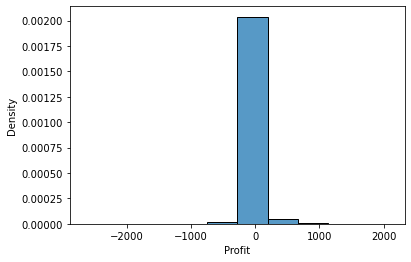

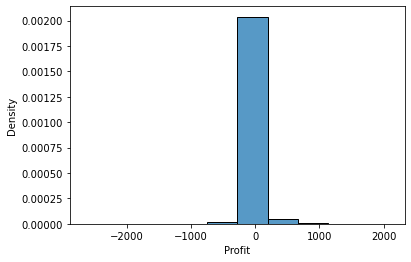

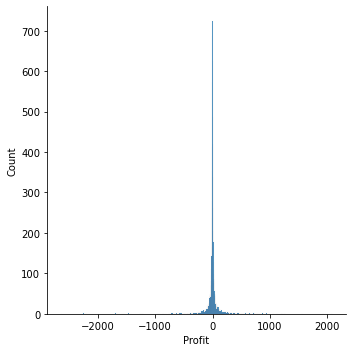

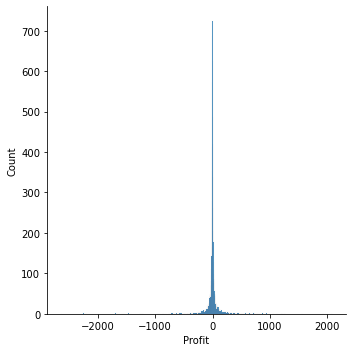

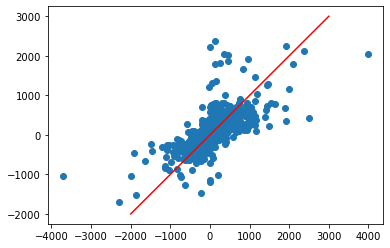

array([ 84.36166  ,  26.429207 ,   2.7511342, ...,  15.367623 ,
        74.32802  , -20.813145 ], dtype=float32)

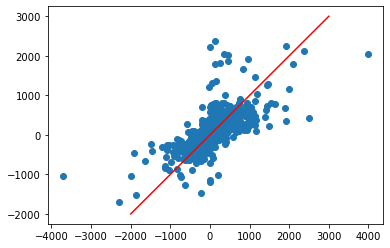

array([ 84.36166  ,  26.429207 ,   2.7511342, ...,  15.367623 ,
        74.32802  , -20.813145 ], dtype=float32)

In [19]:

xgbModel = xgb.XGBRegressor()

analise_model(xgbModel)



In [20]:
# Veio daqui:
# https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/


def hyper_param(model, params):
    print("Modelo atual: " , model)
    
    # cv = cross-validation generator
    # verbose = quanto é apresentado
    tuning_model=GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=3)
    tuning_model.fit(X_train, y_train)
    
    return tuning_model.best_params_
    

In [21]:


def analise_worst_errors(predictions): 
   
    predictions  = predictions.reshape(len(predictions),1 )

    
 
    # Métricas
    print("Piores casos")
   
    only_bigger_than = mean_absolute_error(y_test, predictions)
    df = y_test-predictions
  

    df = df[df["Profit"] > only_bigger_than]
    sns.histplot(df, bins=10,stat="density")
    plt.show()
    
    sns.displot(df)
    plt.show() 

  
    


In [ ]:
parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.01, 0.1, 0.3]
}

''' Parámetros default, para comparar
{
'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 
'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 
'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 
'importance_type': None, 'interaction_constraints': '', 
'learning_rate': 0.300000012, 

'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 

'max_depth': 6, 

'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 

'n_estimators': 100, 

'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 
'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 
'verbosity': None}
'''


best_param1 = hyper_param(xgbModel, parameters)

best_XGB = xgb.XGBRegressor(random_state=RANDOM_SEED)
print("Melhores parâmetros: ", best_param1)
print(best_XGB.set_params(**best_param1))
predictions = analise_model(best_XGB)

analise_worst_errors(predictions)

# Análise da coluna objetivo

In [ ]:
sns.histplot(dataset['Profit'], bins=30,stat="density")
plt.show()
    
sns.displot(dataset['Profit'])
plt.show() 


x = np.quantile(dataset['Profit'], [0,0.25,0.5,0.75,1])

print(x)
#plt.scatter(y_test,predictions)
#plt.show()

### Comentários aos resultados

A versão inicial, sem ajuste dos hiperparêmtros, não apresenta muitos erros, mas a versão após já ajustada consegue melhorar mais os resultados. Pelos gráficos podemos analisar quais as melhores versões.
Para além disso, o RandomForestRegressor continua a ser o melhor modelo, com uma diferença de ~~11376 - 10350 =~~ 1026.

Como a maior parte do lucro está concentrada entre 0 e 36 unidades monetárias, a média de erro pode ser considerada bastante má, porque tem o valor de 36. No entanto, tendo em conta a variação total do target, consideramos que o valor é bastante aceitável, porque 

Estou a avaliar com coisas incorretas, não está o dataset todo
